In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#df = pd.read_csv('11-Linear-Regression/USA_Housing.csv')
df = pd.read_csv('data/USA_Housing.csv')

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population', u'Price', u'Address'],
      dtype='object')

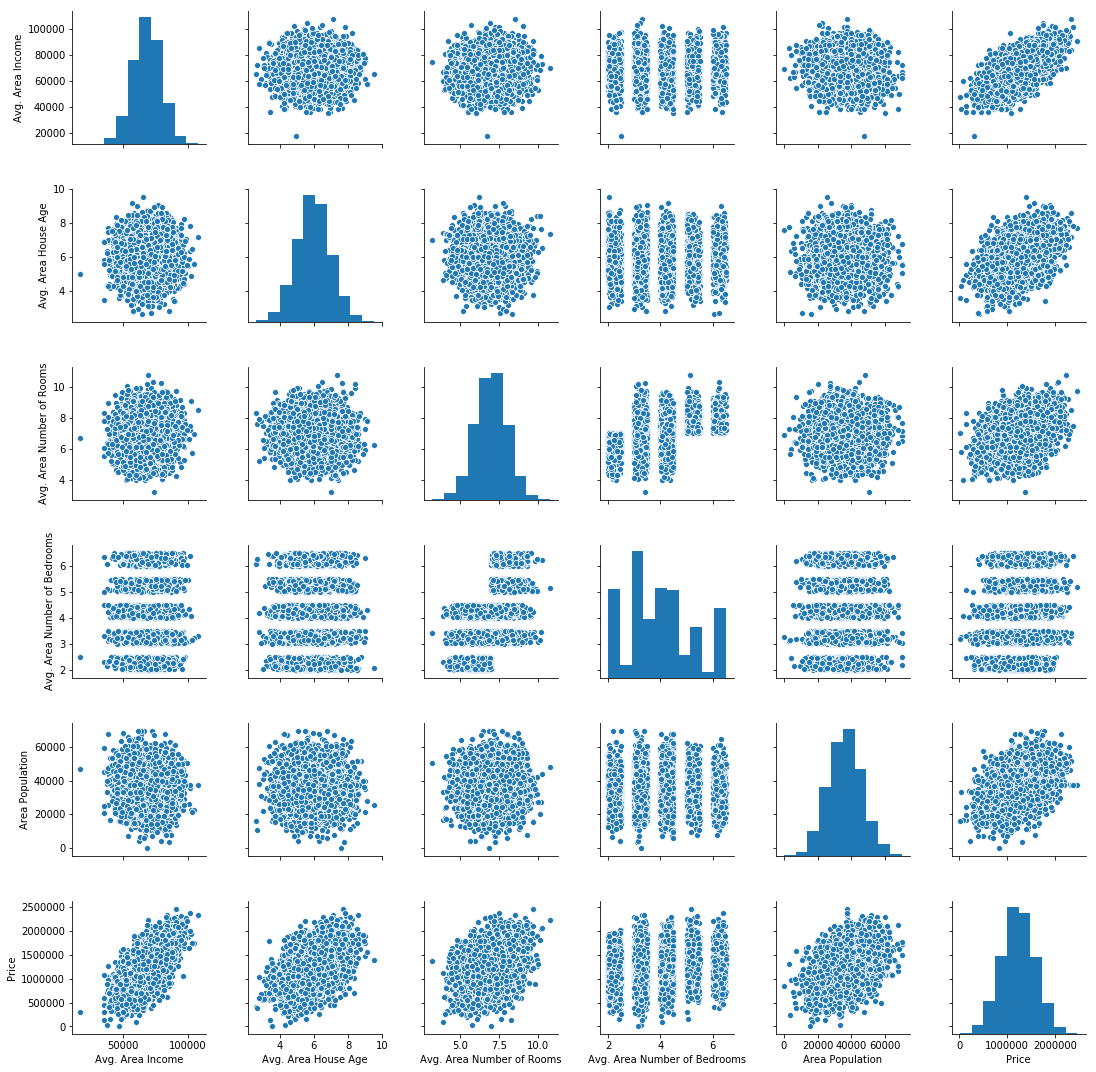

In [133]:
sns.pairplot(df)

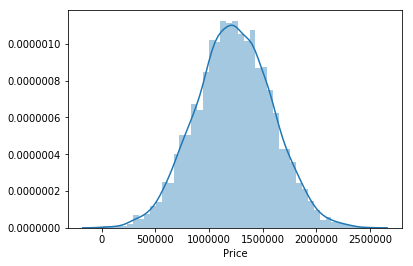

In [10]:
sns.distplot(df['Price'])

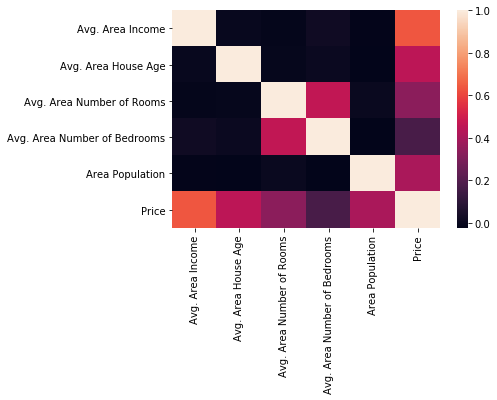

In [11]:
sns.heatmap(df.corr())

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=101)

In [17]:
X= df[['Avg. Area Income', 'Avg. Area House Age',
        'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population']] #df.columns]
y= df['Price']

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

y = a*x1 + b*x2 + c*x3 + d

In [21]:
lm.coef_ , X.columns

(array([2.09728235e+01, 1.62256873e+05, 1.22449772e+05, 6.54917966e+02,
        1.54107930e+01]), Index([u'Avg. Area Income', u'Avg. Area House Age',
        u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
        u'Area Population'],
       dtype='object'))

In [23]:
predictions = lm.predict(X_test)

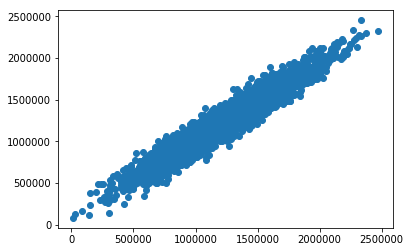

In [24]:
plt.scatter( y_test, predictions)

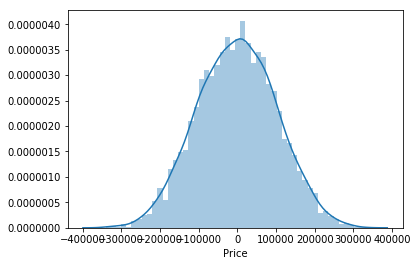

In [25]:
sns.distplot((y_test- predictions), bins=50)

In [26]:
X_test.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124


In [41]:
X_test.at[1718, ['Avg. Area Income']] = 36775

In [42]:
#X_test.at[1718, ['Avg. Area Income', 'Area Population', 'Avg. Area Number of Rooms']] \
#        = 667740.995817, 2, 26008.309124

In [43]:
predictions = lm.predict(X_test)

In [44]:
predictions[0:2]

array([535048.66360003, 827026.80406994])

In [30]:
X_test.at[1718, ['Avg. Area Number of Rooms']] = 7

In [31]:
predictions = lm.predict(X_test)

In [32]:
predictions[0:2]

array([1164233.28008367,  827026.80406994])

In [36]:
df.ix[1718]

/Users/josevazquezgonzalez/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Avg. Area Income                                                            66775
Avg. Area House Age                                                       5.71714
Avg. Area Number of Rooms                                                 7.79521
Avg. Area Number of Bedrooms                                                 4.32
Area Population                                                             36789
Price                                                                 1.25169e+06
Address                         50319 Kathryn Mill Suite 946\nWest Calvin, HI ...
Name: 1718, dtype: object

In [45]:
#train = pd.read_csv('13-Logistic-Regression/titanic_train.csv')
train = pd.read_csv('data/titanic_train.csv')

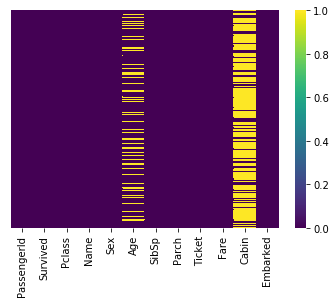

In [46]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

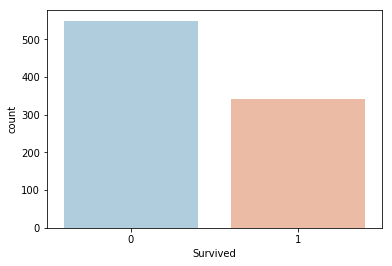

In [215]:
sns.countplot(x='Survived', data=train, palette='RdBu_r')

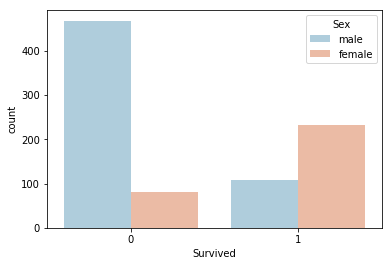

In [217]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

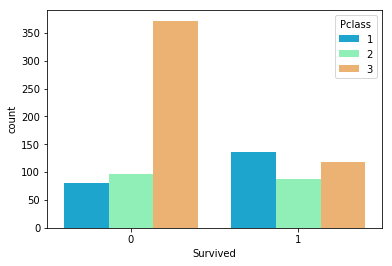

In [219]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

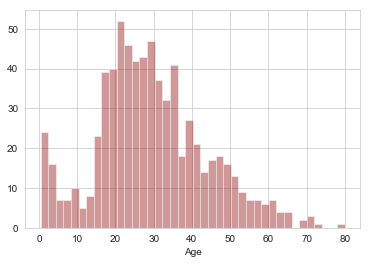

In [224]:
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(), bins=40, kde=False, color='darkred')

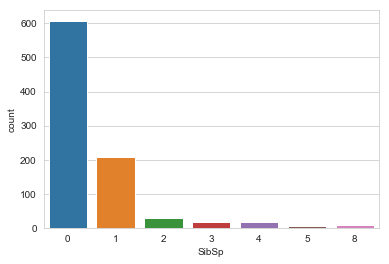

In [225]:
sns.countplot(x='SibSp', data=train)

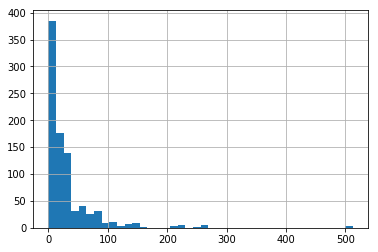

In [51]:
train['Fare'].hist(bins=40)

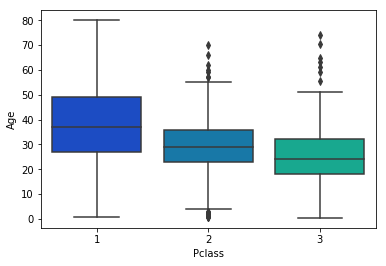

In [52]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [53]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age

In [54]:
train['Age']= train[['Age', 'Pclass']].apply(impute_age, axis=1)

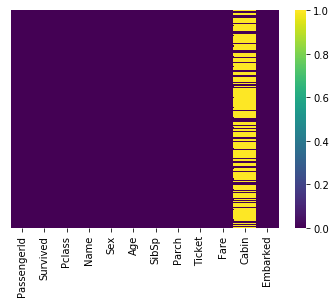

In [55]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [56]:
sex =pd.get_dummies(train['Sex'], drop_first= True)

In [57]:
train = pd.concat([train, sex], axis=1)

In [58]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [76]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
886,887,0,2,27.0,0,0,13.00,1
887,888,1,1,19.0,0,0,30.00,0
888,889,0,3,24.0,1,2,23.45,0
889,890,1,1,26.0,0,0,30.00,1
890,891,0,3,32.0,0,0,7.75,1


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['Survived'], axis=1) ,train['Survived'], 
    test_size=0.1, random_state=101)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logm = LogisticRegression()

In [71]:
logm.fit( X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
predictions = logm.predict(X_test)

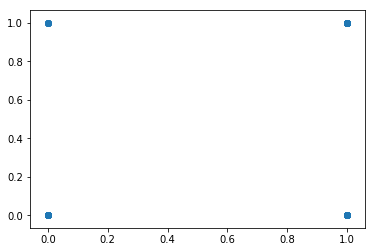

In [73]:
plt.scatter( y_test, predictions)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        51
           1       0.84      0.67      0.74        39

   micro avg       0.80      0.80      0.80        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.80      0.80        90



In [78]:
train.ix[331]

/Users/josevazquezgonzalez/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


PassengerId    332.0
Survived         0.0
Pclass           1.0
Age             45.5
SibSp            0.0
Parch            0.0
Fare            28.5
male             1.0
Name: 331, dtype: float64

In [77]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
331,332,1,45.5,0,0,28.500,1
700,701,1,18.0,1,0,227.525,0
748,749,1,19.0,1,0,53.100,1
751,752,3,6.0,0,1,12.475,1
481,482,2,29.0,0,0,0.000,1


In [82]:
X_test.at[331,'Age']= 30

In [83]:
predictions = logm.predict(X_test)

In [84]:
predictions[0:5]

array([1, 1, 0, 0, 0])

In [27]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [28]:
train.drop('Cabin',axis=1,inplace=True)

In [29]:
train.dropna(inplace=True)

In [30]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [32]:
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)

In [33]:
train = pd.concat([train,sex,embark],axis=1)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
X_test.iloc[0:5]

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.05,1,0,1
613,3,24.0,0,0,7.75,1,1,0
615,2,24.0,1,2,65.00,0,0,1
337,1,41.0,0,0,134.50,0,0,0
718,3,24.0,0,0,15.50,1,1,0


In [119]:
X_test.at[511,'Fare']= 500.

In [120]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,500.00,1,0,1
613,3,24.0,0,0,7.75,1,1,0
615,2,24.0,1,2,65.00,0,0,1
337,1,41.0,0,0,134.50,0,0,0
718,3,24.0,0,0,15.50,1,1,0


In [121]:
predictions = logmodel.predict(X_test.iloc[0:5])

In [122]:
predictions

array([1, 0, 1, 1, 0])

In [95]:
y_test.iloc[0:5]

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

In [85]:
train.ix[511]

/Users/josevazquezgonzalez/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


PassengerId    512.00
Survived         0.00
Pclass           3.00
Age             24.00
SibSp            0.00
Parch            0.00
Fare             8.05
male             1.00
Name: 511, dtype: float64

In [ ]:
Padé, Fouier